In [1]:
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

from src.predict_labels import CellEmbeddingModelWrapper

### Configs

In [2]:
CE_MODEL = '../models/ce.model'
FE_MODEL = '../models/fe.model'
CL_MODEL = '../models/cl.model'
W2V = '../models/glove.840B.300d.txt'
INFERSENT_MODEL = '../models/infersent1.pkl'
VOCAB_SIZE = 60000

### Load model

In [3]:
model = CellEmbeddingModelWrapper(CE_MODEL, FE_MODEL, CL_MODEL, W2V, VOCAB_SIZE, INFERSENT_MODEL)

loading word vectors...
loading word embeddings...
creating dict...
embeddings loaded!


### Comparison function

In [4]:
def compare_embeddings(file_one, file_two, sheet_one, sheet_two):
    sheet_one_embeddings = model.predict_labels(file_one, [sheet_one])[sheet_one]['embeddings'].numpy()
    sheet_two_embeddings = model.predict_labels(file_two, [sheet_two])[sheet_two]['embeddings'].numpy()
    assert sheet_one_embeddings.shape == sheet_two_embeddings.shape

    row_count, column_count, _ = sheet_one_embeddings.shape
    distances = np.empty(shape=(row_count, column_count))
    for i in range(0, row_count):
        for j in range(0, column_count):
            distances[i][j] = np.linalg.norm(sheet_two_embeddings[i][j] - sheet_one_embeddings[i][j])

    flatten_distance = distances.flatten()
    max_distance = max(flatten_distance)
    median_distance = np.median(flatten_distance)
    avg_distance = np.average(flatten_distance)

    counts, bins = np.histogram(flatten_distance, bins=100)
    plt.title(f'Max: {max_distance} Median: {median_distance} Avg: {avg_distance}')
    plt.hist(bins[:-1], bins, weights=counts)
    plt.plot()

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    # Make data.
    X = np.arange(1, column_count + 1, 1)
    Y = np.arange(1, row_count + 1, 1)
    X, Y = np.meshgrid(X, Y)
    Z = distances
    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    # Customize the z axis.
    ax.set_zlim(0, max_distance)
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

Generating embedding for ../data/Book1.xls and Reference
initialize 56 text sentences...


100%|██████████| 56/56 [00:01<00:00, 37.70it/s]


initialize 0 numeric sentences...


0it [00:00, ?it/s]


torch.Size([38, 15, 552])
Generating embedding for ../data/Book1.xls and Reference_copy
initialize 56 text sentences...


100%|██████████| 56/56 [00:01<00:00, 37.97it/s]


initialize 0 numeric sentences...


0it [00:00, ?it/s]


torch.Size([38, 15, 552])


<ipython-input-4-048110770716>:31: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_zlim(0, max_distance)


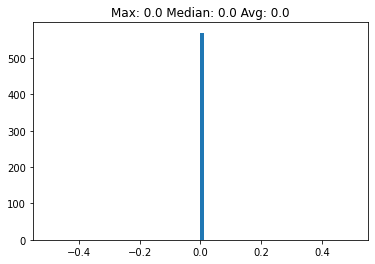

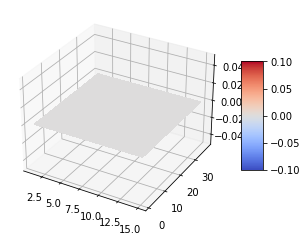

In [5]:
compare_embeddings('../data/Book1.xls', '../data/Book1.xls', 'Reference', 'Reference_copy')

Generating embedding for ../data/Book1.xls and Reference
initialize 56 text sentences...


100%|██████████| 56/56 [00:01<00:00, 37.48it/s]


initialize 0 numeric sentences...


0it [00:00, ?it/s]


torch.Size([38, 15, 552])
Generating embedding for ../data/Book1.xls and Reference_update_single_cell
initialize 57 text sentences...


100%|██████████| 57/57 [00:01<00:00, 37.29it/s]


initialize 0 numeric sentences...


0it [00:00, ?it/s]


torch.Size([38, 15, 552])


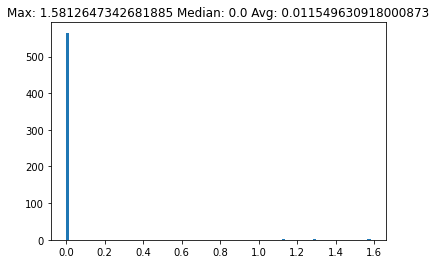

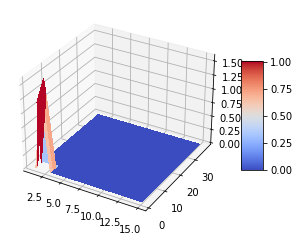

In [6]:
compare_embeddings('../data/Book1.xls', '../data/Book1.xls', 'Reference', 'Reference_update_single_cell')

Generating embedding for ../data/Book1.xls and Reference
initialize 56 text sentences...


100%|██████████| 56/56 [00:01<00:00, 37.14it/s]


initialize 0 numeric sentences...


0it [00:00, ?it/s]


torch.Size([38, 15, 552])
Generating embedding for ../data/Book1.xls and Reference_with_unit_updated
initialize 57 text sentences...


100%|██████████| 57/57 [00:01<00:00, 37.71it/s]


initialize 0 numeric sentences...


0it [00:00, ?it/s]


torch.Size([38, 15, 552])


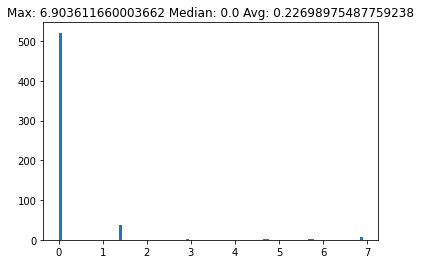

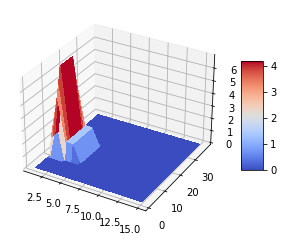

In [7]:
compare_embeddings('../data/Book1.xls', '../data/Book1.xls', 'Reference', 'Reference_with_unit_updated')

Generating embedding for ../data/Book1.xls and Reference
initialize 56 text sentences...


100%|██████████| 56/56 [00:01<00:00, 37.53it/s]


initialize 0 numeric sentences...


0it [00:00, ?it/s]


torch.Size([38, 15, 552])
Generating embedding for ../data/Book1.xls and Reference_without_format
initialize 56 text sentences...


100%|██████████| 56/56 [00:01<00:00, 36.84it/s]


initialize 0 numeric sentences...


0it [00:00, ?it/s]


torch.Size([38, 15, 552])


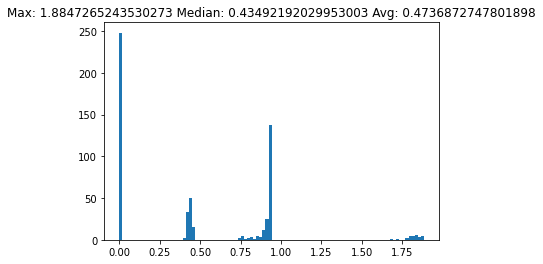

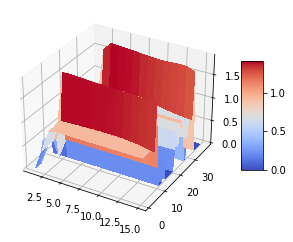

In [8]:
compare_embeddings('../data/Book1.xls', '../data/Book1.xls', 'Reference', 'Reference_without_format')
